In [2]:
import pandas as pd

FILE = r'C:\Users\seo\Downloads\mushroom.csv'
df = pd.read_csv(FILE)

---
[1] 데이터확인

In [3]:
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

---
[2] 데이터 타겟 구분

In [6]:
data = df.iloc[:,1:]
target = df.iloc[:,0]

In [11]:
data.shape, target.shape

((8124, 22), (8124,))

---
[3] 순서가 없는 라벨이므로, one_hot_encoding

In [7]:
data_oh = pd.get_dummies(data)

In [13]:
data_oh.shape

(8124, 117)

In [14]:
data_oh.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


---
[4] 훈련 및 import

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [9]:
X_trian, X_test, y_train, y_test = train_test_split(data_oh,target, random_state=11, test_size=0.2)
len(X_trian),len(X_test),len(y_train),len(y_test)

(6499, 1625, 6499, 1625)

In [10]:
model = DecisionTreeClassifier()

In [11]:
tree_model = cross_val_score(model, X_trian,y_train,cv=5)

In [12]:
tree_model.mean()

0.9996923076923077

In [13]:
model.fit(X_trian,y_train)


DecisionTreeClassifier()

In [14]:
y_pre = model.predict(X_test)

In [15]:
accuracy_score(y_pre,y_test)

0.9987692307692307

[Text(0.6111111111111112, 0.9375, 'x[27] <= 0.5\ngini = 0.5\nsamples = 6499\nvalue = [3349, 3150]'),
 Text(0.3888888888888889, 0.8125, 'x[53] <= 0.5\ngini = 0.287\nsamples = 3701\nvalue = [643, 3058]'),
 Text(0.2777777777777778, 0.6875, 'x[55] <= 0.5\ngini = 0.132\nsamples = 3259\nvalue = [231, 3028]'),
 Text(0.2222222222222222, 0.5625, 'x[101] <= 0.5\ngini = 0.05\nsamples = 3108\nvalue = [80, 3028]'),
 Text(0.16666666666666666, 0.4375, 'x[25] <= 0.5\ngini = 0.024\nsamples = 3065\nvalue = [37, 3028]'),
 Text(0.1111111111111111, 0.3125, 'x[22] <= 0.5\ngini = 0.012\nsamples = 3046\nvalue = [18, 3028]'),
 Text(0.05555555555555555, 0.1875, 'gini = 0.0\nsamples = 3028\nvalue = [0, 3028]'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.2222222222222222, 0.3125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.2777777777777778, 0.4375, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(0.3333333333333333, 0.5625, 'gini = 0.0\nsamples = 151\nval

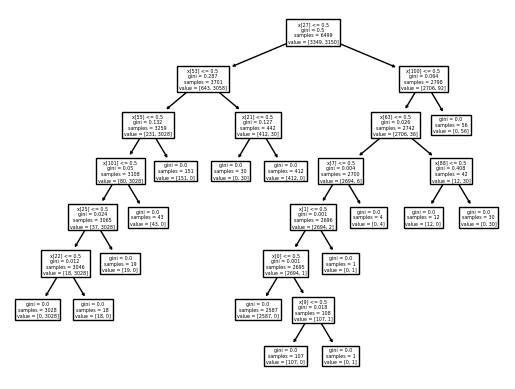

In [16]:
plot_tree(model)

In [52]:
y_test.value_counts()

e    859
p    766
Name: poisonous, dtype: int64

In [17]:
from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree.dot',class_names=['e','p'], 
                feature_names=X_trian.columns, impurity=True,filled=True)



In [45]:
y_test.shape

(1625,)

In [48]:
X_trian.shape

(6499, 117)

In [46]:
X_test.shape

(1625, 117)

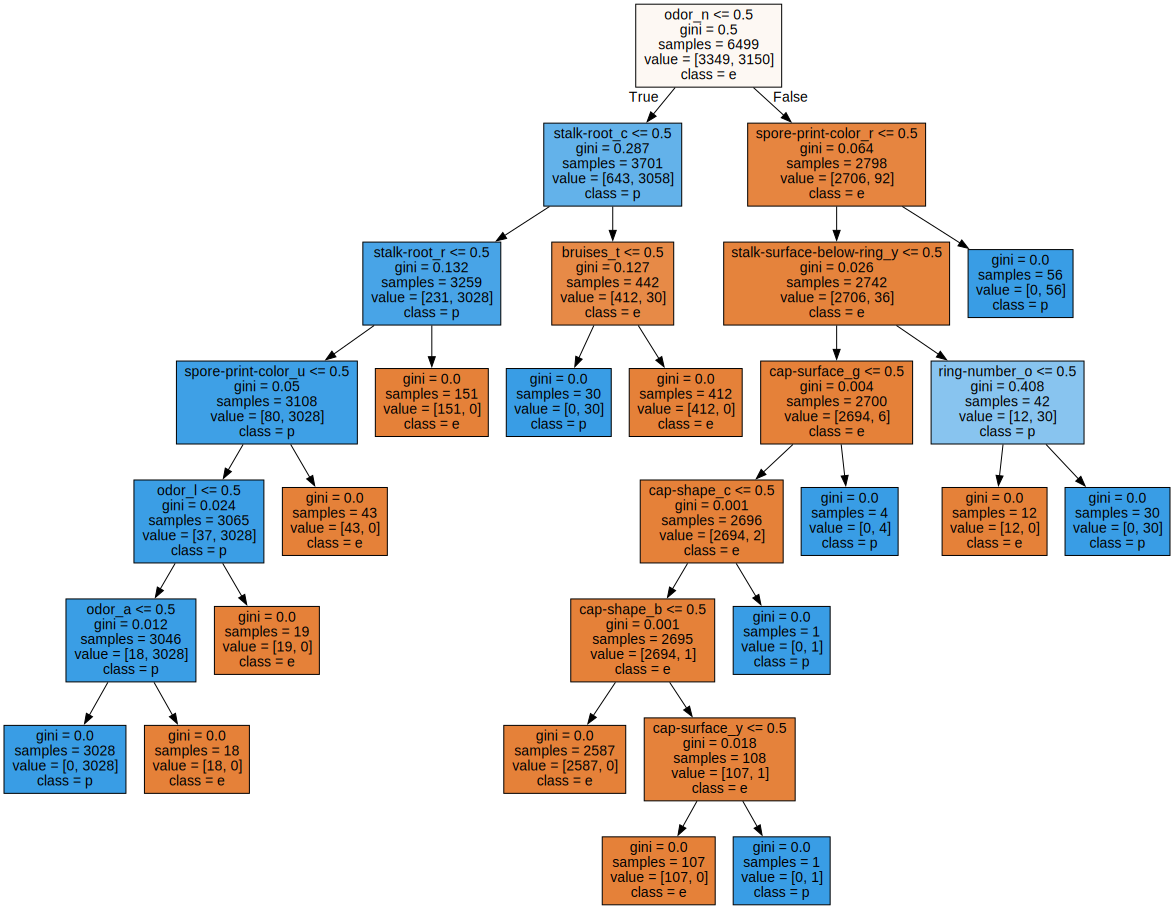

In [18]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)